In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score,roc_auc_score

In [2]:
!wget https://raw.githubusercontent.com/anup-garg/Financial-Data-Project-with-Python-ML/main/BankChurners.csv

--2025-09-05 04:30:24--  https://raw.githubusercontent.com/anup-garg/Financial-Data-Project-with-Python-ML/main/BankChurners.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1210878 (1.2M) [text/plain]
Saving to: ‘BankChurners.csv’

BankChurners.csv    100%[===================>]   1.15M  --.-KB/s    in 0.009s  

2025-09-05 04:30:24 (123 MB/s) - ‘BankChurners.csv’ saved [1210878/1210878]



In [3]:
path = "/content/BankChurners.csv"

In [4]:
df = pd.read_csv(path)

**Data Summary**

In [5]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [6]:
df.shape

(10127, 21)

In [7]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [8]:
df.tail(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


In [9]:
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.drop(columns = ['CLIENTNUM'], axis = 1, inplace = True)


In [12]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [13]:
df['Education_Level'].value_counts()

,count
Education_Level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [14]:
df['Income_Category'].value_counts()

,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In [15]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [16]:
df.isnull().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


In [17]:
df['Marital_Status'].value_counts()

,count
Marital_Status,
Married,4687
Single,3943
Unknown,749
Divorced,748


In [18]:
df.isnull().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [21]:
convert = df.select_dtypes(include=['object']).columns.to_list()
df[convert] = df[convert].apply(lambda x: x.astype('category'))

In [22]:
col_encode = df.select_dtypes(include=['category']).columns.to_list()
col_encode.remove('Attrition_Flag')
data_encode = pd.get_dummies(df, columns = col_encode, dtype = int)

In [23]:
df_encode_org = pd.concat([data_encode, df[col_encode]], axis=1)

In [24]:
df_encode_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Attrition_Flag                  10127 non-null  category
 1   Customer_Age                    10127 non-null  int64   
 2   Dependent_count                 10127 non-null  int64   
 3   Months_on_book                  10127 non-null  int64   
 4   Total_Relationship_Count        10127 non-null  int64   
 5   Months_Inactive_12_mon          10127 non-null  int64   
 6   Contacts_Count_12_mon           10127 non-null  int64   
 7   Credit_Limit                    10127 non-null  float64 
 8   Total_Revolving_Bal             10127 non-null  int64   
 9   Avg_Open_To_Buy                 10127 non-null  float64 
 10  Total_Amt_Chng_Q4_Q1            10127 non-null  float64 
 11  Total_Trans_Amt                 10127 non-null  int64   
 12  Total_Trans_Ct    

In [25]:
df_encode_org.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,45,3,39,5,1,3,12691.0,777,11914.0,...,0,1,0,0,0,M,High School,Married,$60K - $80K,Blue
1,Existing Customer,49,5,44,6,1,2,8256.0,864,7392.0,...,0,1,0,0,0,F,Graduate,Single,Less than $40K,Blue
2,Existing Customer,51,3,36,4,1,0,3418.0,0,3418.0,...,0,1,0,0,0,M,Graduate,Married,$80K - $120K,Blue
3,Existing Customer,40,4,34,3,4,1,3313.0,2517,796.0,...,0,1,0,0,0,F,High School,Unknown,Less than $40K,Blue
4,Existing Customer,40,3,21,5,1,0,4716.0,0,4716.0,...,0,1,0,0,0,M,Uneducated,Married,$60K - $80K,Blue


In [26]:
df_encode_org['Attrition_Flag'].value_counts()

,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


In [27]:
df_encode_org['target'] = df_encode_org['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)


In [28]:
x = df_encode_org.drop(columns = ['Attrition_Flag', 'target'], axis = 1)
y = df_encode_org['target']

In [29]:
y = y.astype(int)

Now that the data has been loaded and preprocessed, let's split the data into training and testing sets for model building.

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9114, 42)
(1013, 42)
(9114,)
(1013,)


In [32]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9114 entries, 1112 to 7270
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Customer_Age                    9114 non-null   int64   
 1   Dependent_count                 9114 non-null   int64   
 2   Months_on_book                  9114 non-null   int64   
 3   Total_Relationship_Count        9114 non-null   int64   
 4   Months_Inactive_12_mon          9114 non-null   int64   
 5   Contacts_Count_12_mon           9114 non-null   int64   
 6   Credit_Limit                    9114 non-null   float64 
 7   Total_Revolving_Bal             9114 non-null   int64   
 8   Avg_Open_To_Buy                 9114 non-null   float64 
 9   Total_Amt_Chng_Q4_Q1            9114 non-null   float64 
 10  Total_Trans_Amt                 9114 non-null   int64   
 11  Total_Trans_Ct                  9114 non-null   int64   
 12  Total_Ct_Chng_Q4_Q1   

EDA Part

In [33]:
train = pd.concat([x_train, y_train], axis = 1)

In [34]:
print("Target variable distribution in the training set:")
print(train['target'].value_counts())

Target variable distribution in the training set:
target
0    7632
1    1482
Name: count, dtype: int64


/tmp/ipython-input-3144007447.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'target', data = train, palette = 'Set2')


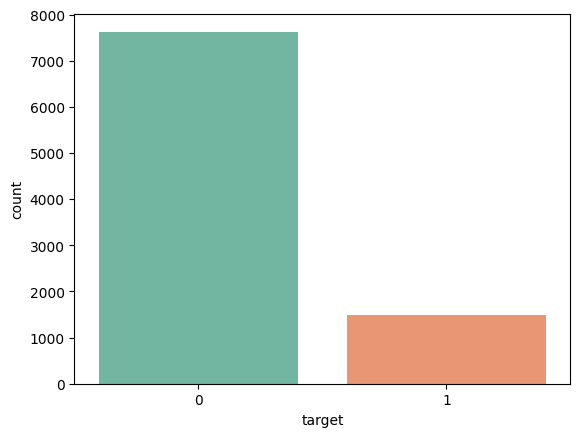

In [35]:
sns.countplot(x = 'target', data = train, palette = 'Set2')
plt.show()

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9114 entries, 1112 to 7270
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Customer_Age                    9114 non-null   int64   
 1   Dependent_count                 9114 non-null   int64   
 2   Months_on_book                  9114 non-null   int64   
 3   Total_Relationship_Count        9114 non-null   int64   
 4   Months_Inactive_12_mon          9114 non-null   int64   
 5   Contacts_Count_12_mon           9114 non-null   int64   
 6   Credit_Limit                    9114 non-null   float64 
 7   Total_Revolving_Bal             9114 non-null   int64   
 8   Avg_Open_To_Buy                 9114 non-null   float64 
 9   Total_Amt_Chng_Q4_Q1            9114 non-null   float64 
 10  Total_Trans_Amt                 9114 non-null   int64   
 11  Total_Trans_Ct                  9114 non-null   int64   
 12  Total_Ct_Chng_Q4_Q1   

Univariate Analysis

In [37]:
col_category = train.select_dtypes(include = 'category').columns.to_list()
col_category

['Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']


 --- Category Feature Analysis


/tmp/ipython-input-2503299306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = col, data = train, order = train[col].value_counts().index, palette = 'Set2')


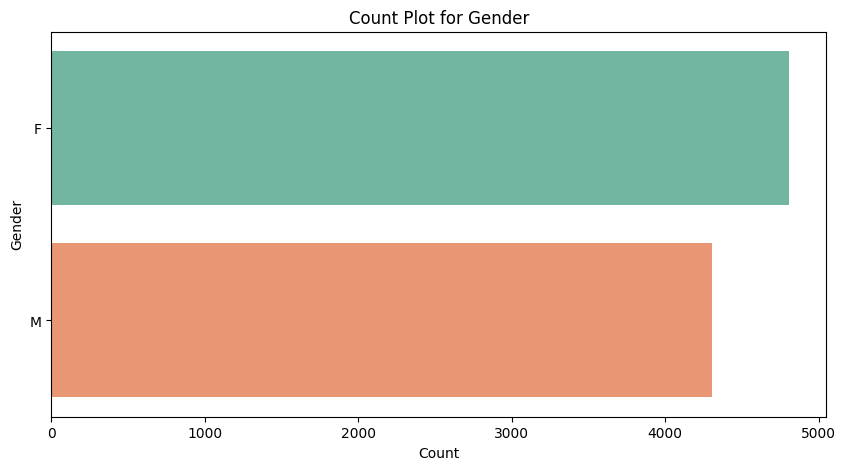

/tmp/ipython-input-2503299306.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = train.groupby(col)['target'].mean().sort_values(ascending = False) * 100
/tmp/ipython-input-2503299306.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = churn_rate.index, x = churn_rate.values, palette = 'Set2')


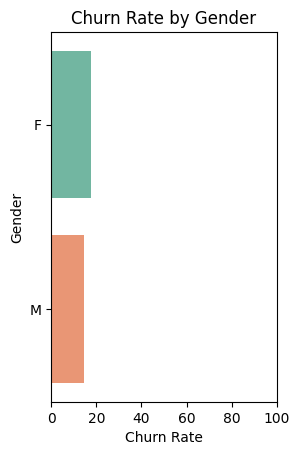

/tmp/ipython-input-2503299306.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby(col)['target'].mean().sort_values(ascending = False) * 100)
/tmp/ipython-input-2503299306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = col, data = train, order = train[col].value_counts().index, palette = 'Set2')


Churn rate by Gender
Gender
F    17.820753
M    14.518002
Name: target, dtype: float64


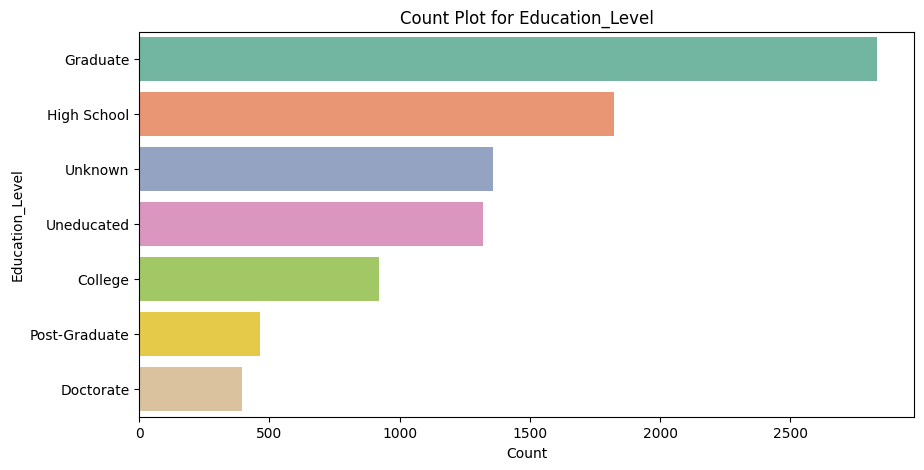

/tmp/ipython-input-2503299306.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = train.groupby(col)['target'].mean().sort_values(ascending = False) * 100
/tmp/ipython-input-2503299306.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = churn_rate.index, x = churn_rate.values, palette = 'Set2')


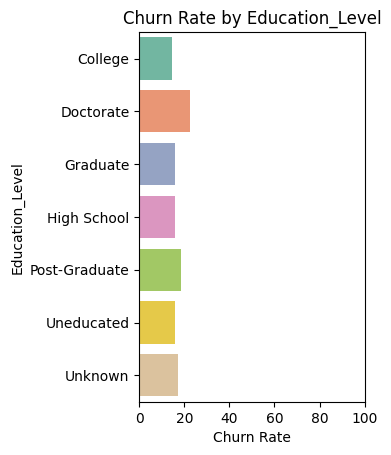

/tmp/ipython-input-2503299306.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby(col)['target'].mean().sort_values(ascending = False) * 100)
/tmp/ipython-input-2503299306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = col, data = train, order = train[col].value_counts().index, palette = 'Set2')


Churn rate by Education_Level
Education_Level
Doctorate        22.335025
Post-Graduate    18.358531
Unknown          17.292127
Graduate         15.808045
Uneducated       15.745647
High School      15.679825
College          14.363439
Name: target, dtype: float64


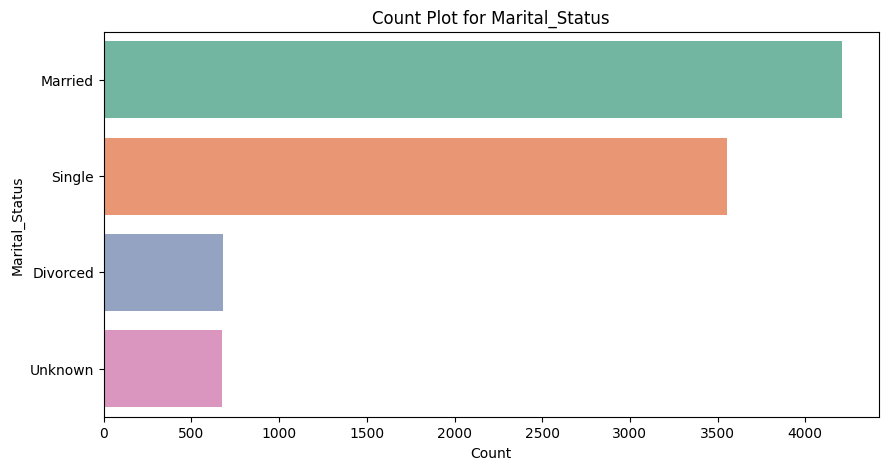

/tmp/ipython-input-2503299306.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = train.groupby(col)['target'].mean().sort_values(ascending = False) * 100
/tmp/ipython-input-2503299306.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = churn_rate.index, x = churn_rate.values, palette = 'Set2')


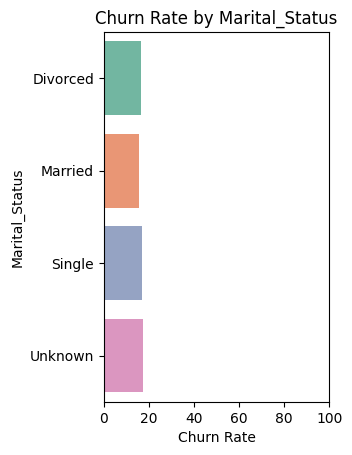

/tmp/ipython-input-2503299306.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby(col)['target'].mean().sort_values(ascending = False) * 100)
/tmp/ipython-input-2503299306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = col, data = train, order = train[col].value_counts().index, palette = 'Set2')


Churn rate by Marital_Status
Marital_Status
Unknown     17.455621
Single      16.948198
Divorced    16.395864
Married     15.466857
Name: target, dtype: float64


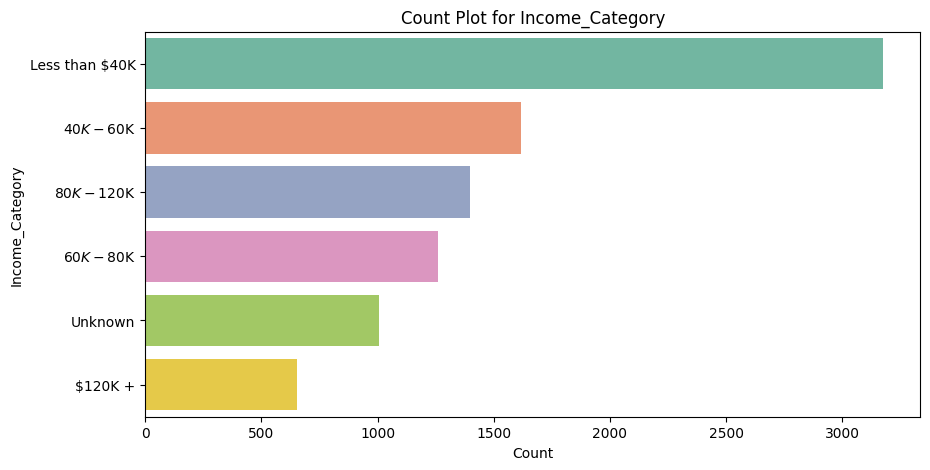

/tmp/ipython-input-2503299306.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = train.groupby(col)['target'].mean().sort_values(ascending = False) * 100
/tmp/ipython-input-2503299306.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = churn_rate.index, x = churn_rate.values, palette = 'Set2')


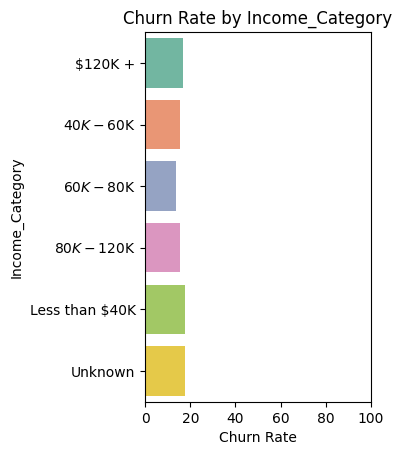

/tmp/ipython-input-2503299306.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby(col)['target'].mean().sort_values(ascending = False) * 100)
/tmp/ipython-input-2503299306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = col, data = train, order = train[col].value_counts().index, palette = 'Set2')


Churn rate by Income_Category
Income_Category
Less than $40K    17.595216
Unknown           17.495030
$120K +           16.871166
$80K - $120K      15.582559
$40K - $60K       15.203956
$60K - $80K       13.708399
Name: target, dtype: float64


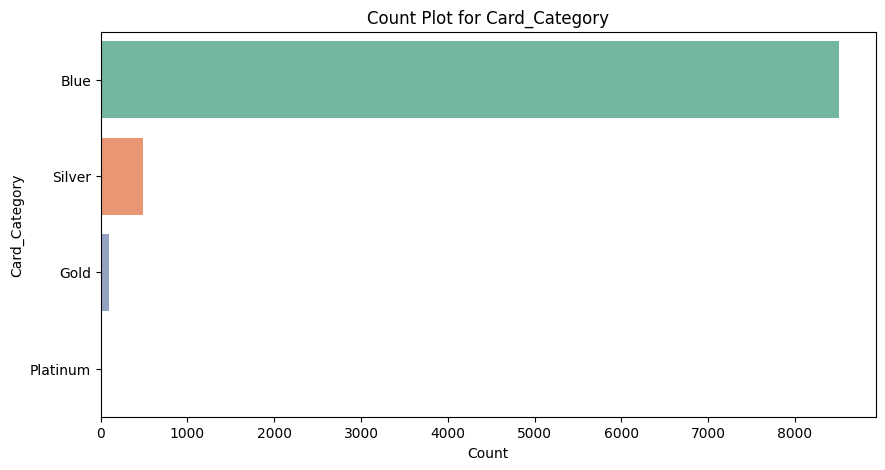

/tmp/ipython-input-2503299306.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = train.groupby(col)['target'].mean().sort_values(ascending = False) * 100
/tmp/ipython-input-2503299306.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = churn_rate.index, x = churn_rate.values, palette = 'Set2')


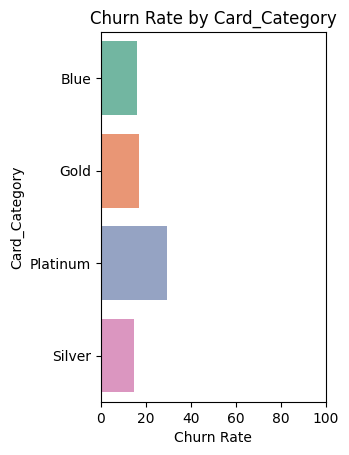

Churn rate by Card_Category
Card_Category
Platinum    29.411765
Gold        17.000000
Blue        16.306137
Silver      14.867617
Name: target, dtype: float64


/tmp/ipython-input-2503299306.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train.groupby(col)['target'].mean().sort_values(ascending = False) * 100)


In [38]:
print("\n --- Category Feature Analysis")
for col in col_category:
  plt.figure(figsize = (10, 5))
  sns.countplot(y = col, data = train, order = train[col].value_counts().index, palette = 'Set2')
  plt.title(f"Count Plot for {col}")
  plt.xlabel("Count")
  plt.ylabel(col)
  plt.show()

  # plot 2 : Churn rate  by category
  plt.subplot(1,2,2)
  churn_rate = train.groupby(col)['target'].mean().sort_values(ascending = False) * 100
  sns.barplot(y = churn_rate.index, x = churn_rate.values, palette = 'Set2')
  plt.title(f"Churn Rate by {col}")
  plt.xlabel("Churn Rate")
  plt.ylabel(col)
  plt.xlim(0,100)
  plt.show()

  print(f"Churn rate by {col}")
  print(train.groupby(col)['target'].mean().sort_values(ascending = False) * 100)


In [39]:
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [40]:
numeri_col = df.select_dtypes(exclude='category').columns.to_list()
numeri_col

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [42]:
print("\n numeric feature summary")
train[numeri_col].describe().T


 numeric feature summary


,count,mean,std,min,25%,50%,75%,max
Customer_Age,9114.0,46.325982,8.023520,26.0,41.000,46.000,52.000,70.000
Dependent_count,9114.0,2.335528,1.292423,0.0,1.000,2.000,3.000,5.000
Months_on_book,9114.0,35.940970,8.008077,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,9114.0,3.817533,1.552390,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,9114.0,2.344196,1.011253,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,9114.0,2.456221,1.103998,0.0,2.000,2.000,3.000,6.000
Credit_Limit,9114.0,8617.602030,9063.677064,1438.3,2552.250,4531.000,11089.750,34516.000
Total_Revolving_Bal,9114.0,1158.928352,816.991084,0.0,278.000,1274.000,1781.750,2517.000
Avg_Open_To_Buy,9114.0,7458.673678,9061.074297,3.0,1338.000,3469.500,9914.250,34516.000
Total_Amt_Chng_Q4_Q1,9114.0,0.759138,0.217022,0.0,0.631,0.736,0.857,3.397


/tmp/ipython-input-4244131912.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col],kde = True,  palette = 'skyblue')


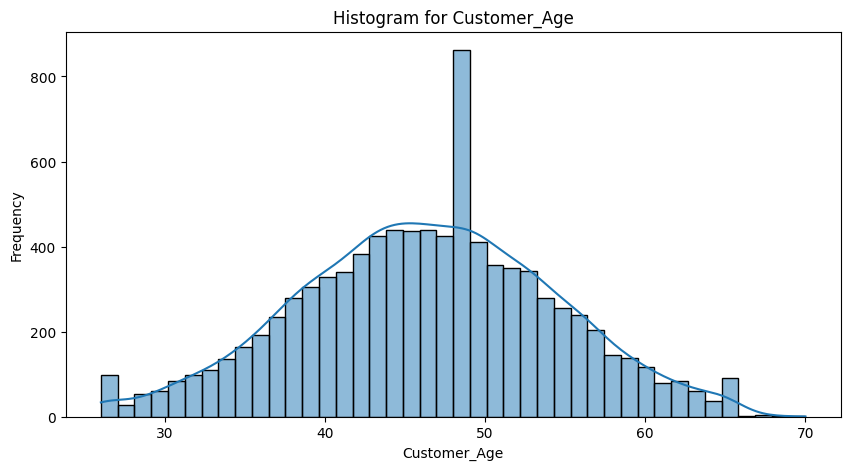

/tmp/ipython-input-4244131912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'target', y = col, data = train, palette = 'Set2')


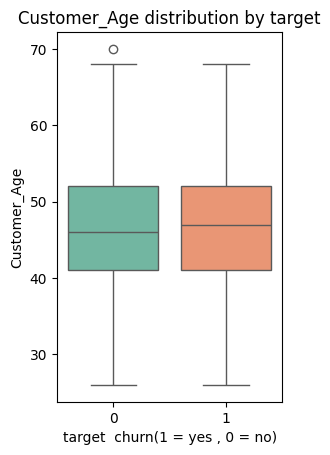

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-4244131912.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col],kde = True,  palette = 'skyblue')


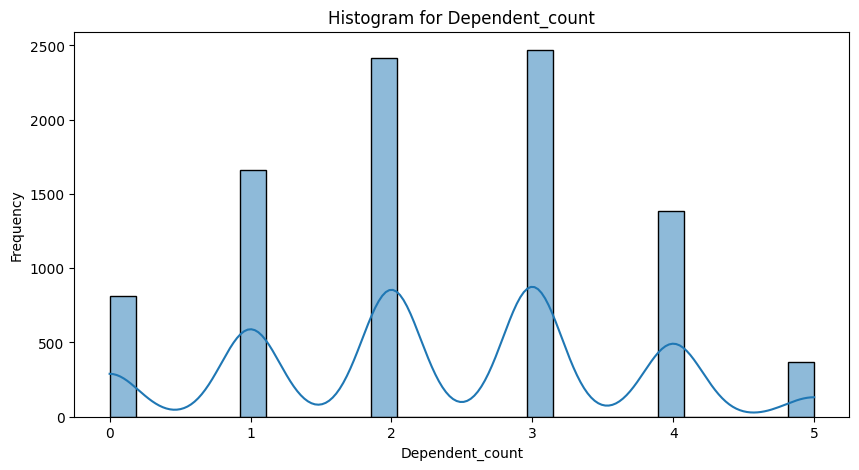

/tmp/ipython-input-4244131912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'target', y = col, data = train, palette = 'Set2')


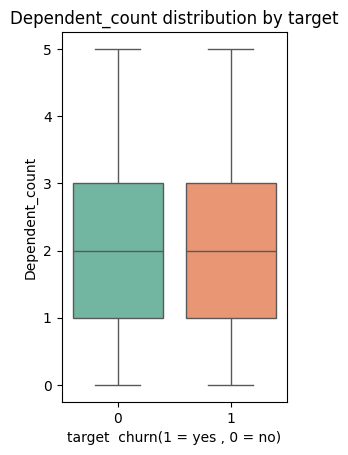

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-4244131912.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col],kde = True,  palette = 'skyblue')


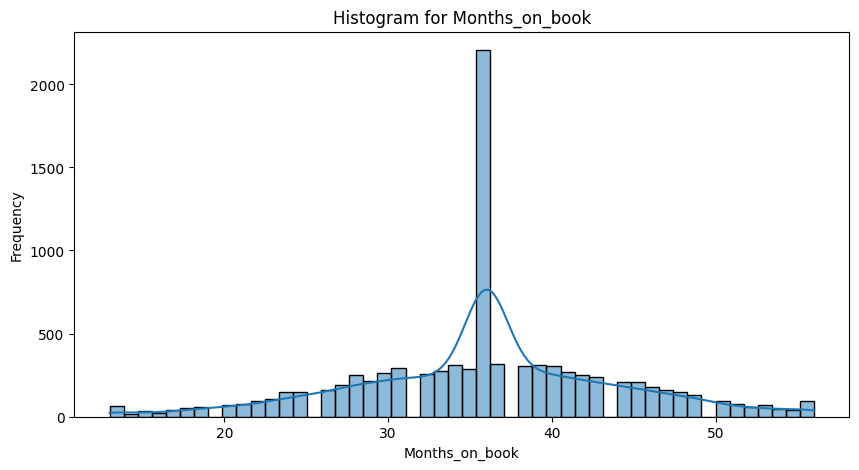

/tmp/ipython-input-4244131912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'target', y = col, data = train, palette = 'Set2')


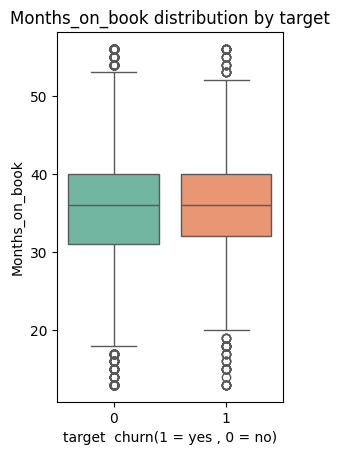

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-4244131912.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col],kde = True,  palette = 'skyblue')


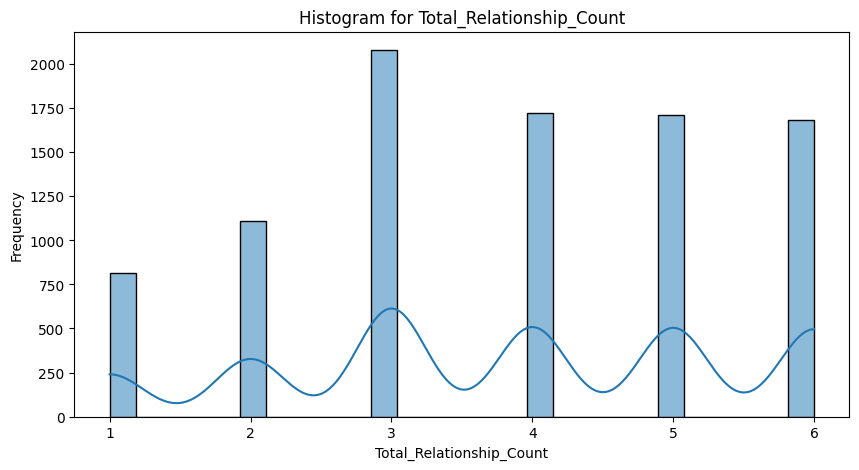

/tmp/ipython-input-4244131912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'target', y = col, data = train, palette = 'Set2')


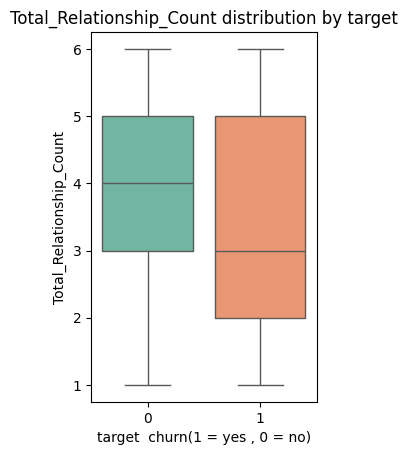

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-4244131912.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col],kde = True,  palette = 'skyblue')


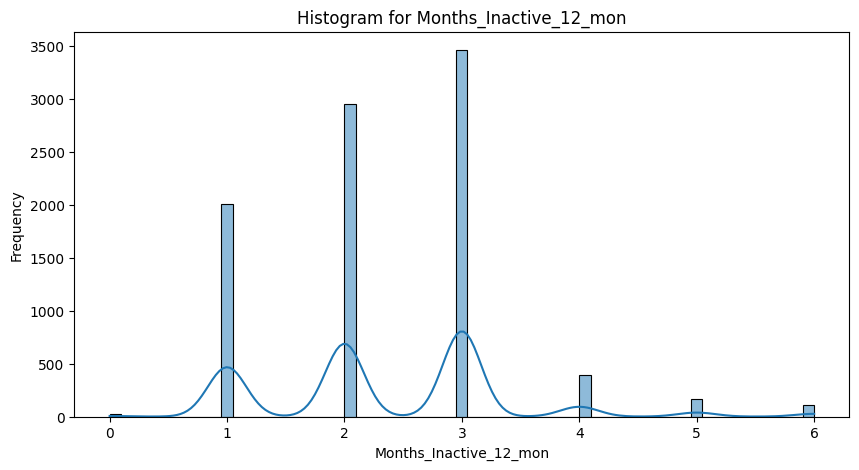

/tmp/ipython-input-4244131912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'target', y = col, data = train, palette = 'Set2')


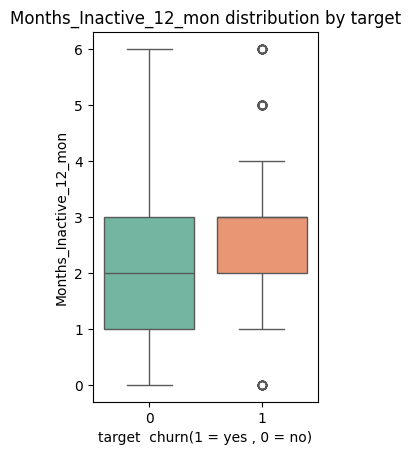

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-4244131912.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col],kde = True,  palette = 'skyblue')


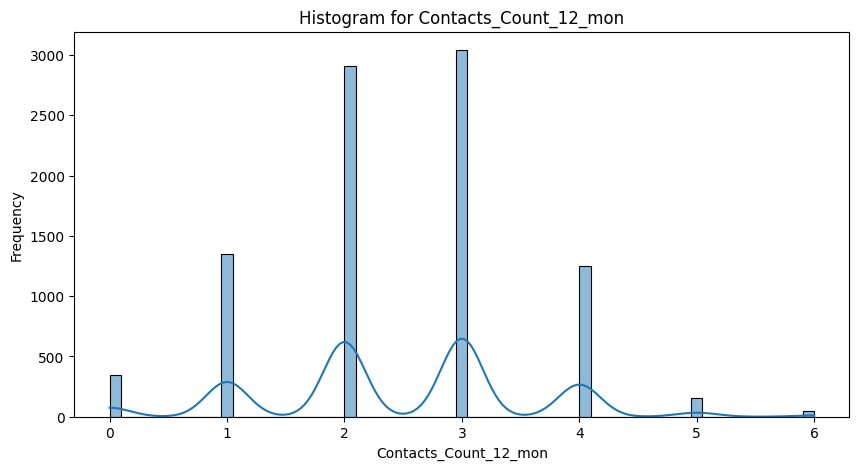

/tmp/ipython-input-4244131912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'target', y = col, data = train, palette = 'Set2')


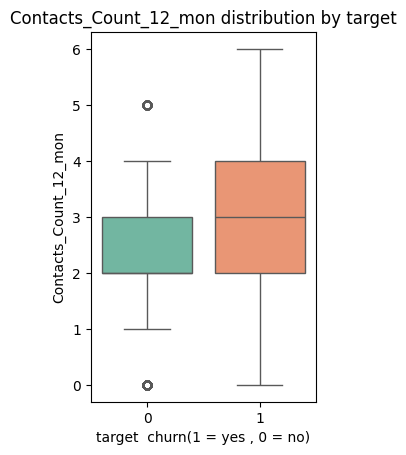

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-4244131912.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col],kde = True,  palette = 'skyblue')


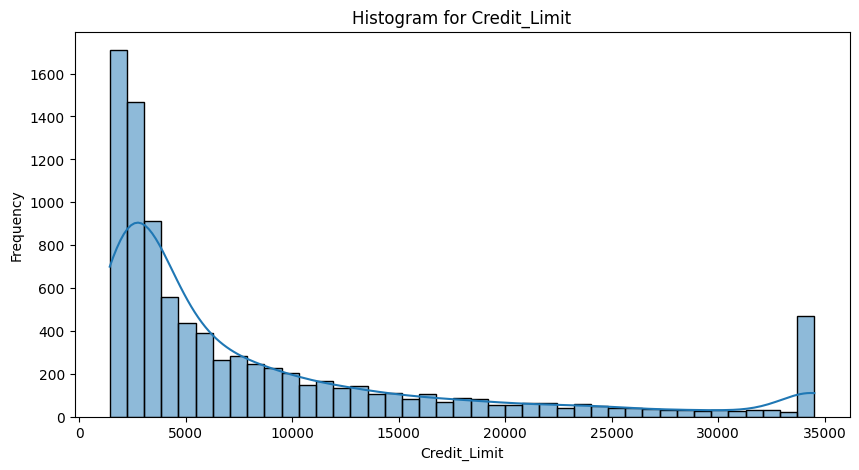

/tmp/ipython-input-4244131912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'target', y = col, data = train, palette = 'Set2')


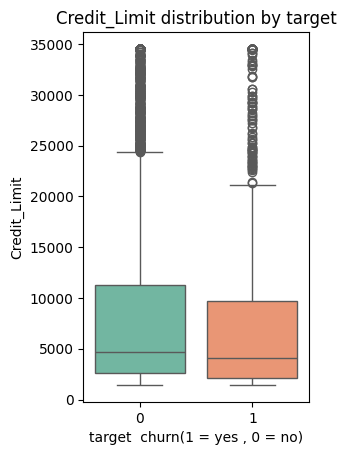

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-4244131912.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col],kde = True,  palette = 'skyblue')


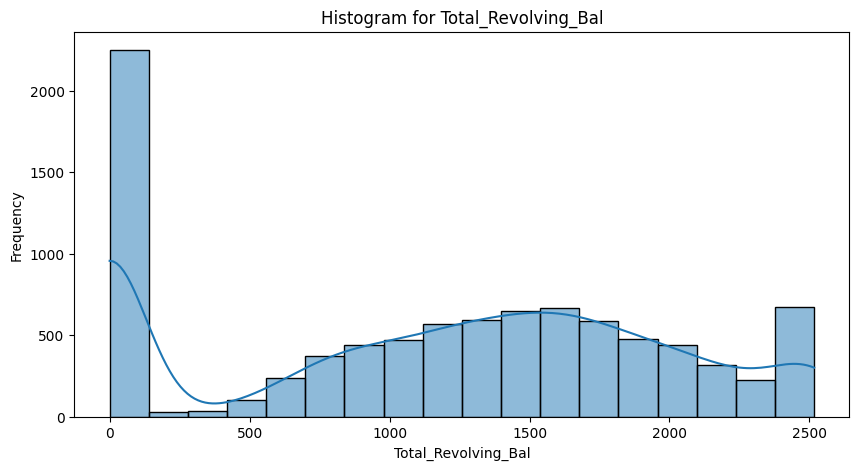

/tmp/ipython-input-4244131912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'target', y = col, data = train, palette = 'Set2')


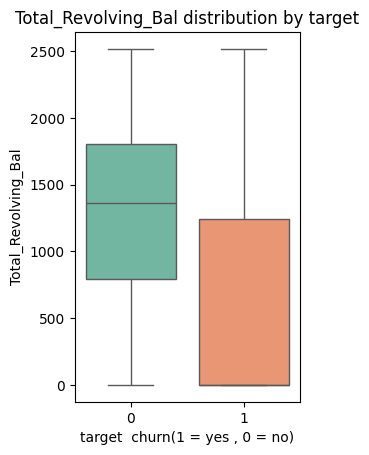

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-4244131912.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col],kde = True,  palette = 'skyblue')


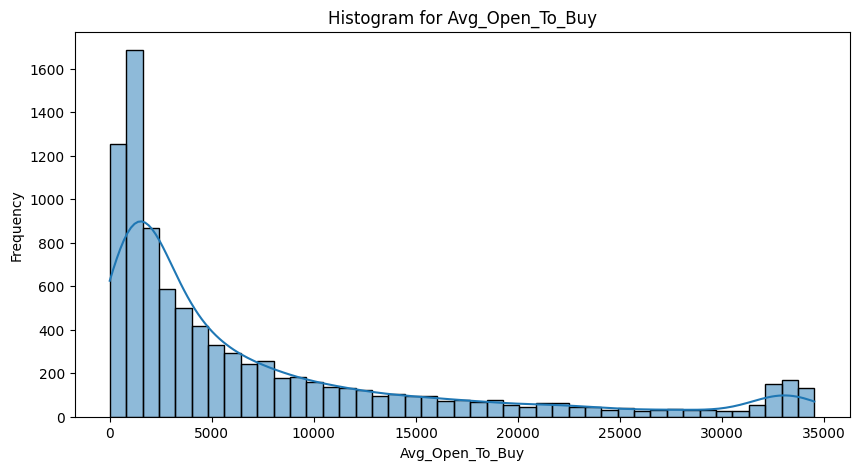

/tmp/ipython-input-4244131912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'target', y = col, data = train, palette = 'Set2')


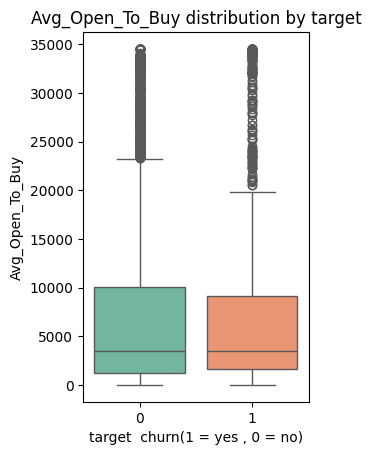

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-4244131912.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col],kde = True,  palette = 'skyblue')


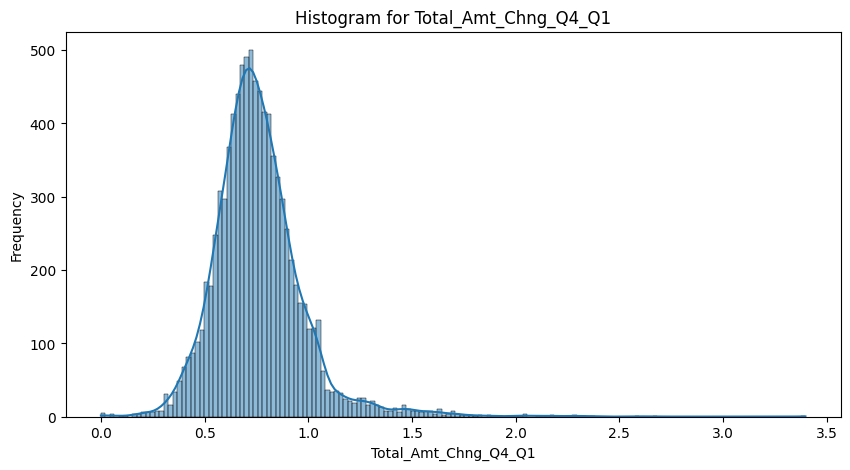

/tmp/ipython-input-4244131912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'target', y = col, data = train, palette = 'Set2')


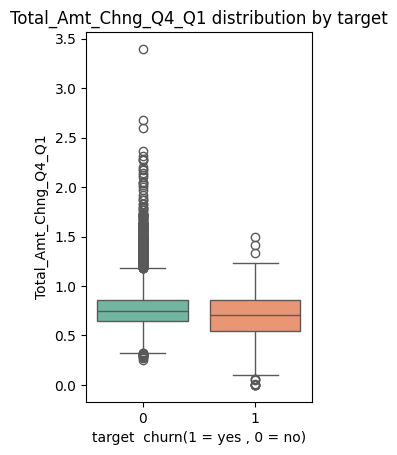

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-4244131912.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col],kde = True,  palette = 'skyblue')


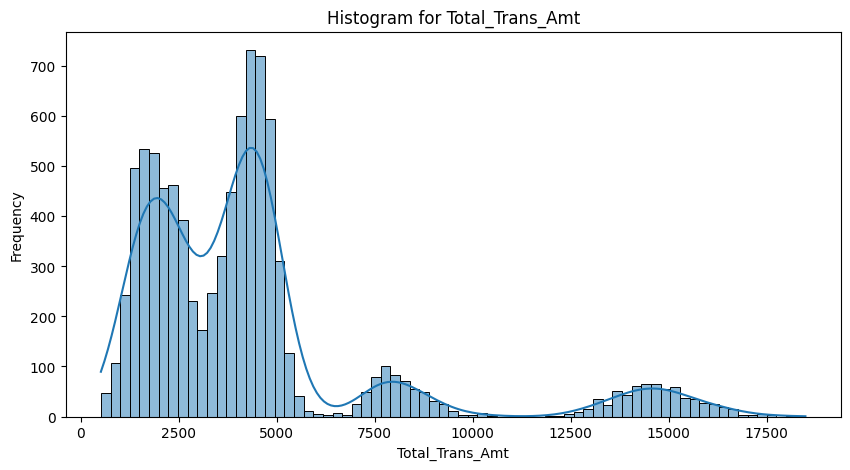

/tmp/ipython-input-4244131912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'target', y = col, data = train, palette = 'Set2')


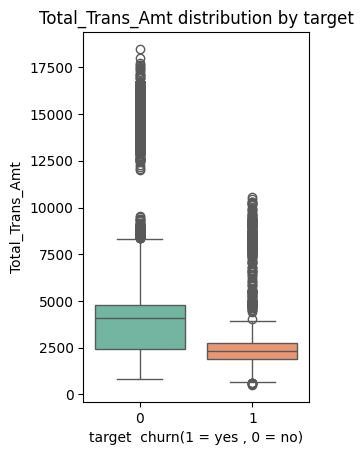

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-4244131912.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col],kde = True,  palette = 'skyblue')


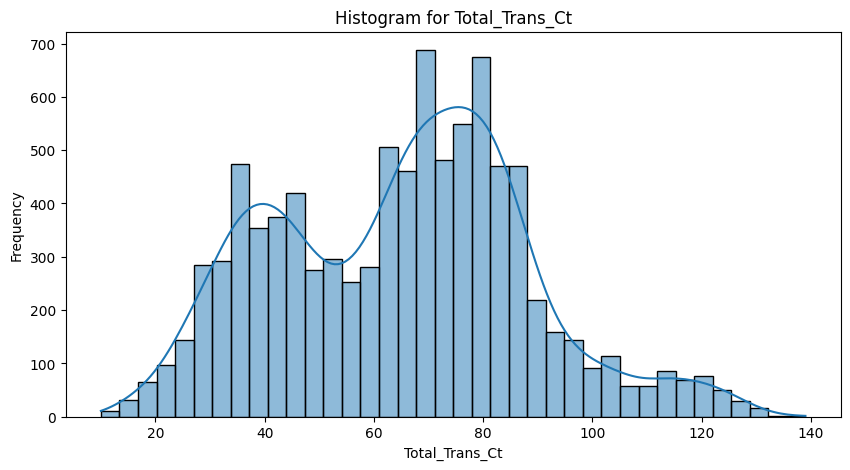

/tmp/ipython-input-4244131912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'target', y = col, data = train, palette = 'Set2')


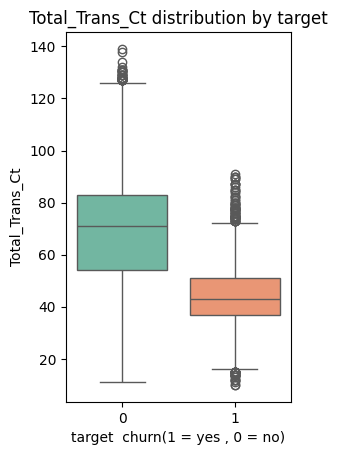

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-4244131912.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col],kde = True,  palette = 'skyblue')


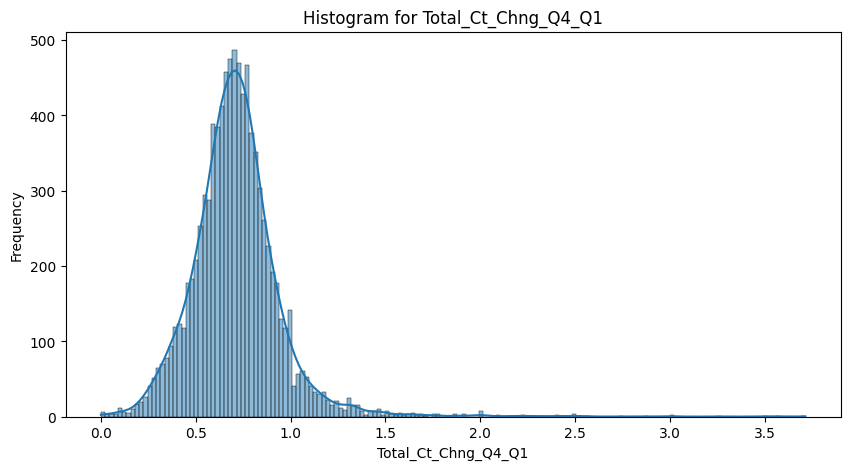

/tmp/ipython-input-4244131912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'target', y = col, data = train, palette = 'Set2')


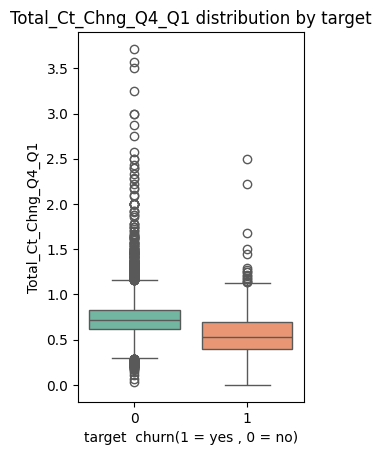

<Figure size 640x480 with 0 Axes>

/tmp/ipython-input-4244131912.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train[col],kde = True,  palette = 'skyblue')


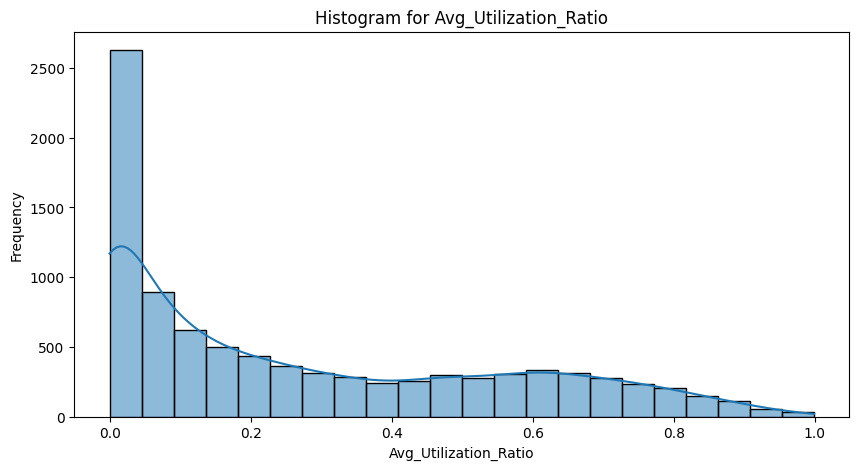

/tmp/ipython-input-4244131912.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'target', y = col, data = train, palette = 'Set2')


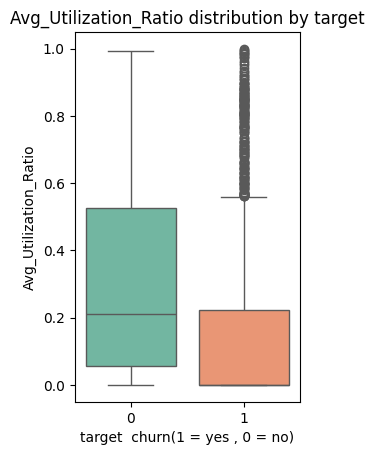

<Figure size 640x480 with 0 Axes>

In [43]:
for col in numeri_col:
  plt.figure(figsize = (10, 5))
  sns.histplot(train[col],kde = True,  palette = 'skyblue')
  plt.title(f"Histogram for {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

  # plot 2 Box plot camparing churn or not

  plt.subplot(1,2,2)
  sns.boxplot(x = 'target', y = col, data = train, palette = 'Set2')
  plt.title(f"{col} distribution by target")
  plt.xlabel("target  churn(1 = yes , 0 = no)")
  plt.ylabel(col)
  plt.show()

  plt.tight_layout()
  plt.show()

In [44]:
# Multivariate Analysis

numeri_cl_target = numeri_col + ['target']
corr_matrix = train[numeri_cl_target].corr()
corr_matrix


,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,target
Customer_Age,1.000000,-0.116517,0.790345,-0.008007,0.053372,-0.010312,0.002872,0.013930,0.001617,-0.061856,-0.047527,-0.068459,-0.010234,0.006017,0.025420
Dependent_count,-0.116517,1.000000,-0.101121,-0.030465,-0.006931,-0.040616,0.068279,-0.001724,0.068454,-0.033939,0.016610,0.042570,0.009212,-0.035754,0.020189
Months_on_book,0.790345,-0.101121,1.000000,-0.004009,0.074177,-0.003346,0.005193,0.009900,0.004302,-0.053377,-0.039643,-0.050505,-0.015190,-0.005155,0.016133
Total_Relationship_Count,-0.008007,-0.030465,-0.004009,1.000000,-0.003607,0.053060,-0.074070,0.013755,-0.075332,0.046120,-0.346625,-0.238248,0.035416,0.071399,-0.149712
Months_Inactive_12_mon,0.053372,-0.006931,0.074177,-0.003607,1.000000,0.031338,-0.017599,-0.039084,-0.014080,-0.034231,-0.037217,-0.041598,-0.040709,-0.006209,0.153759
Contacts_Count_12_mon,-0.010312,-0.040616,-0.003346,0.053060,0.031338,1.000000,0.025583,-0.060660,0.031060,-0.021938,-0.114415,-0.160379,-0.097110,-0.061541,0.212483
Credit_Limit,0.002872,0.068279,0.005193,-0.074070,-0.017599,0.025583,1.000000,0.048255,0.995936,0.011323,0.171088,0.075317,-0.001527,-0.480134,-0.027480
Total_Revolving_Bal,0.013930,-0.001724,0.009900,0.013755,-0.039084,-0.060660,0.048255,1.000000,-0.041896,0.052786,0.069756,0.064239,0.089274,0.624317,-0.268439
Avg_Open_To_Buy,0.001617,0.068454,0.004302,-0.075332,-0.014080,0.031060,0.995936,-0.041896,1.000000,0.006567,0.164848,0.069546,-0.009576,-0.536563,-0.003284
Total_Amt_Chng_Q4_Q1,-0.061856,-0.033939,-0.053377,0.046120,-0.034231,-0.021938,0.011323,0.052786,0.006567,1.000000,0.039553,0.004181,0.378498,0.035351,-0.128977


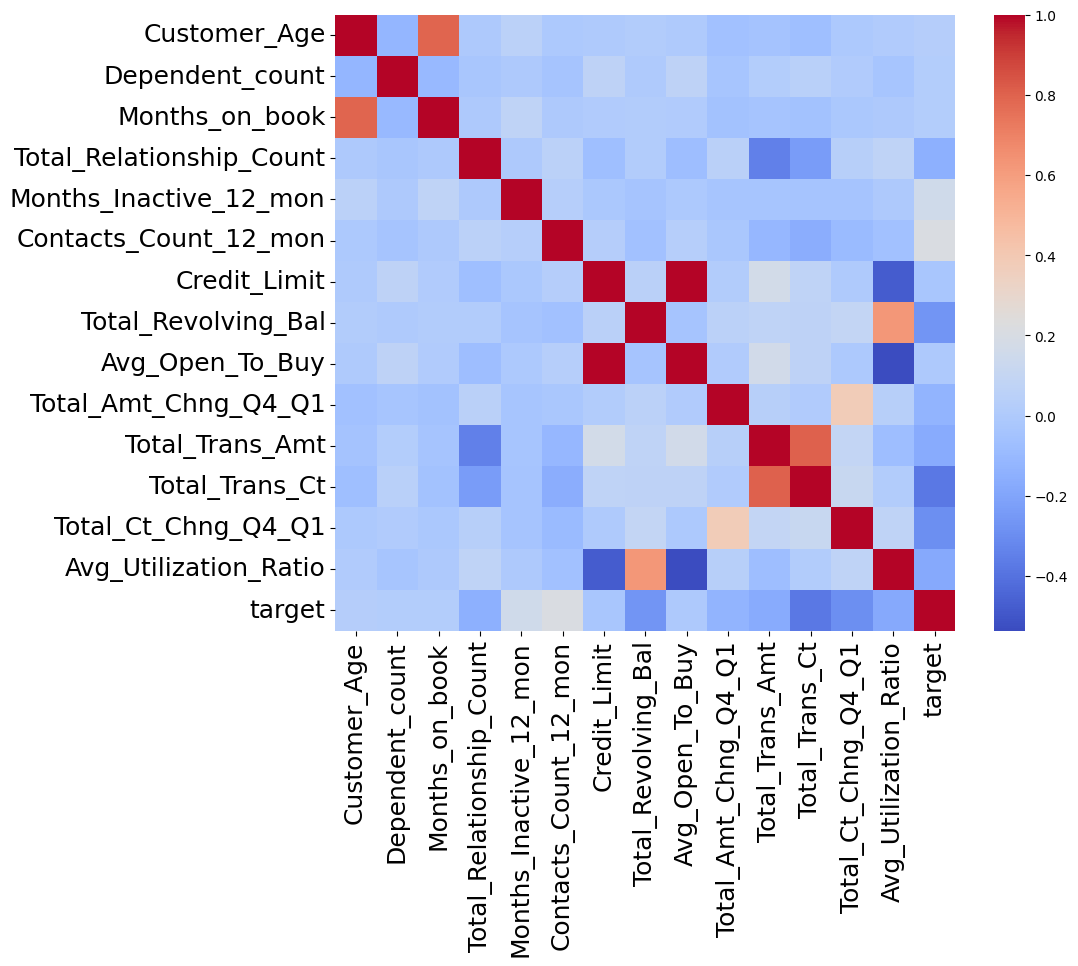

In [47]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm',fmt=".2f")
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

In [48]:
print(corr_matrix['target'].sort_values(ascending=False))

target                      1.000000
Contacts_Count_12_mon       0.212483
Months_Inactive_12_mon      0.153759
Customer_Age                0.025420
Dependent_count             0.020189
Months_on_book              0.016133
Avg_Open_To_Buy            -0.003284
Credit_Limit               -0.027480
Total_Amt_Chng_Q4_Q1       -0.128977
Total_Relationship_Count   -0.149712
Total_Trans_Amt            -0.175762
Avg_Utilization_Ratio      -0.181482
Total_Revolving_Bal        -0.268439
Total_Ct_Chng_Q4_Q1        -0.291445
Total_Trans_Ct             -0.379669
Name: target, dtype: float64


Let's apply Logistic Regression to the training data.

In [50]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)

# Drop the original categorical columns from x_train and x_test
categorical_cols_to_drop = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
x_train_encoded = x_train.drop(columns=categorical_cols_to_drop)
x_test_encoded = x_test.drop(columns=categorical_cols_to_drop)

model.fit(x_train_encoded, y_train)

LogisticRegression(random_state=42, solver='liblinear')

Now, let's evaluate the model on the test data.

In [51]:
# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8914116485686081
Confusion Matrix:
[[842  26]
 [ 84  61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       868
           1       0.70      0.42      0.53       145

    accuracy                           0.89      1013
   macro avg       0.81      0.70      0.73      1013
weighted avg       0.88      0.89      0.88      1013



Let's apply the Random Forest Classifier.

In [52]:
# Initialize and train the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_encoded, y_train)

RandomForestClassifier(random_state=42)

Now, let's evaluate the Random Forest model on the test data.

In [53]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(x_test_encoded)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Confusion Matrix:\n{conf_matrix_rf}")
print(f"Random Forest Classification Report:\n{class_report_rf}")

Random Forest Accuracy: 0.9506416584402764
Random Forest Confusion Matrix:
[[853  15]
 [ 35 110]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       868
           1       0.88      0.76      0.81       145

    accuracy                           0.95      1013
   macro avg       0.92      0.87      0.89      1013
weighted avg       0.95      0.95      0.95      1013



In [55]:
XG = XGBClassifier()
XG.fit(x_train_encoded, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [56]:
y_xg_prd = XG.predict(x_test_encoded)

# Evaluate the model
accuracy_XG = accuracy_score(y_test, y_xg_prd)
conf_matrix_XG = confusion_matrix(y_test, y_xg_prd)
class_report_XG = classification_report(y_test, y_xg_prd)

print(f": XG Boost{accuracy_XG}")
print(f"XG Boost Confusion Matrix:\n{conf_matrix_XG}")
print(f"XG Boost Classification Report:\n{class_report_XG}")


: XG Boost0.9644619940769991
XG Boost Confusion Matrix:
[[852  16]
 [ 20 125]]
XG Boost Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       868
           1       0.89      0.86      0.87       145

    accuracy                           0.96      1013
   macro avg       0.93      0.92      0.93      1013
weighted avg       0.96      0.96      0.96      1013

